### Entropy in information theory

"Surprising" (unpredictable) things convey more information. 

The more the unpredictable the more the entropy.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import string
import requests
import re

In [5]:
response = requests.get("https://gutenberg.org/files/35/35-0.txt")
text = response.text

In [6]:
# character strings to replace with space
strings_to_replace = [
    '\r\n\r\nâ\x80\x9c', # new paragraph
    'â\x80\x9c',         # open quote
    'â\x80\x9d',         # close quote
    '\r\n',              # new line
    'â\x80\x94',         # hyphen
    'â\x80\x99',         # single apostrophe
    'â\x80\x98',         # single quote
    '_',                 # underscore, used for stressing
]

In [7]:
for strings_to_match in strings_to_replace:
    regex_pattern = re.compile(r'%s' %strings_to_match)
    text = regex_pattern.sub(" ", text)

In [8]:
text = text[3:]

## Distribution of word lengths.

In [9]:
words = text.split(" ")
word_length_count = np.zeros(len(words))

for word_i in range(len(words)):
    word_length_count[word_i] = len(words[word_i])

In [10]:
maximum = 0
for word in words:
    maximum = max(maximum, len(word))
    
word_counts = np.zeros(maximum + 1)
for word in words:
    word_counts[len(word)] += 1

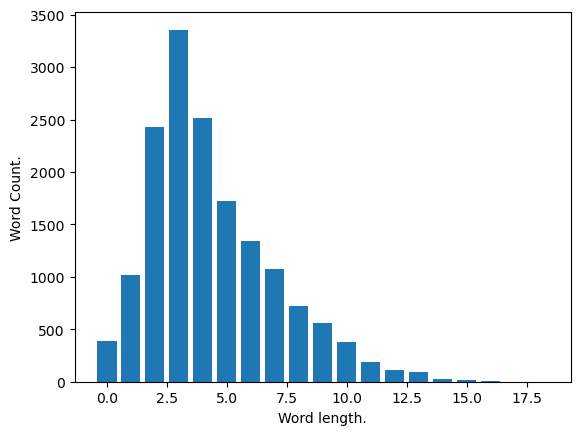

In [11]:
plt.bar(range(len(word_counts)), word_counts)

plt.xlabel("Word length.")
plt.ylabel("Word Count.")
plt.show()

## Letter frequencies.

In [12]:
# binary search
def is_char_in_word(words,char):
    start = 0
    end = len(words)-1
    while start <= end:
        mid = int(start + (end-start) / 2)
        if char < words[mid]:
            end = mid - 1
        elif char > words[mid]:
            start = mid + 1
        else:
            return mid
    return -1

In [13]:
letters = string.ascii_lowercase
letter_frequencies = np.zeros(len(letters))

for letter in text.lower():
    if is_char_in_word(letters, letter) != -1:
        letter_frequencies[ord(letter)-97] += 1

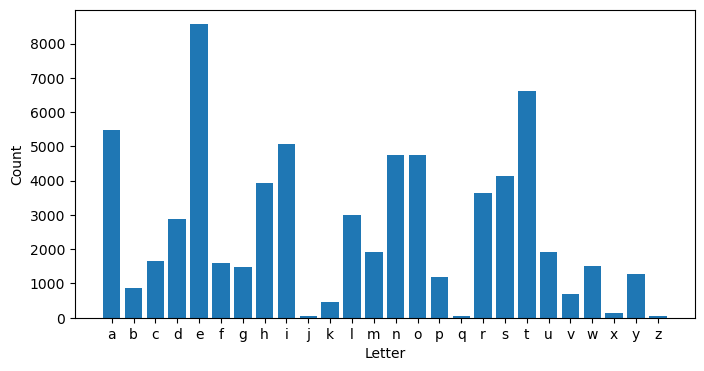

In [14]:
fix,ax = plt.subplots(1,figsize=(8,4))

ax.bar(list(letters), letter_frequencies)

ax.set_xlabel("Letter")
ax.set_ylabel("Count")
plt.show()

## Entropy of english letters in text.

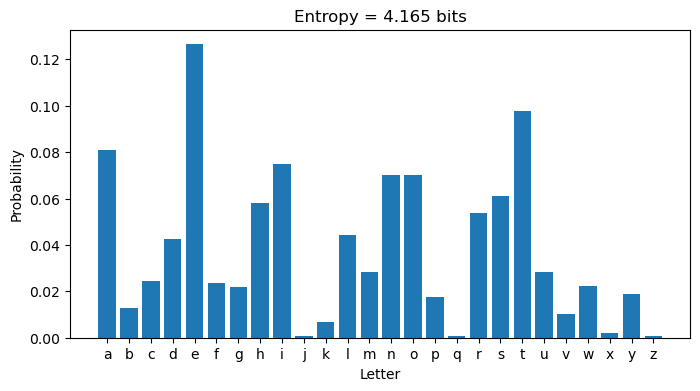

In [15]:
letter_probability = letter_frequencies / sum(letter_frequencies)

entropy = -sum(letter_probability * np.log2(letter_probability + np.finfo(float).eps))


fig,ax = plt.subplots(1,figsize=(8,4))
ax.bar(list(letters), letter_probability)

ax.set_title("Entropy = %.3f bits"%entropy)
ax.set_xlabel("Letter")
ax.set_ylabel("Probability")
plt.show()

## Conditional (sequence) entropy.

In [16]:
num_letters = len(letters)
probability_matrix = np.zeros((num_letters, num_letters))

for i in range(len(text)-1):
    current_letter = text[i]
    next_letter = text[i+1]
    if current_letter in letters and next_letter in letters:
        # in the row of the current first letter,
        # increase the number at the current column of 
        # specific row.
        probability_matrix[letters.index(current_letter), letters.index(next_letter)] += 1

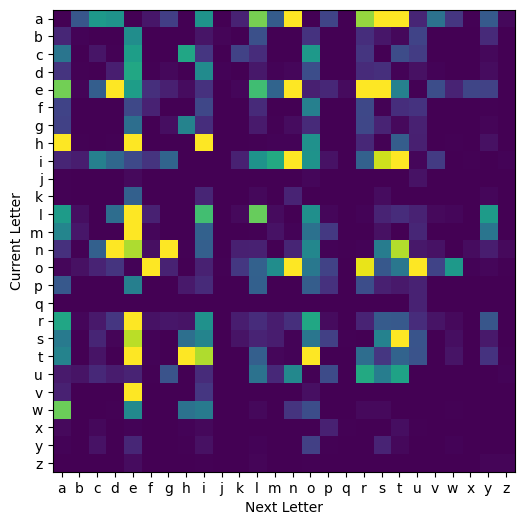

In [17]:
fig,ax = plt.subplots(1,figsize=(6,6))

# increase the maximum color
ax.imshow(probability_matrix, vmax=500)

ax.set_xlabel("Next Letter")
ax.set_ylabel("Current Letter")
ax.set_xticks(range(num_letters))
ax.set_yticks(range(num_letters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)
plt.show()

In [18]:
conditional_entropy = np.zeros(num_letters)

for row in range(num_letters):
    # here currently this is not probabilities, it will be converted later
    probabilities = probability_matrix[row, :]
    # convert count to probabilities
    probabilities /= sum(probabilities)
    # compute entropy for each individual letter
    conditional_entropy[row] = -sum(probabilities*np.log2(probabilities + np.finfo(float).eps))

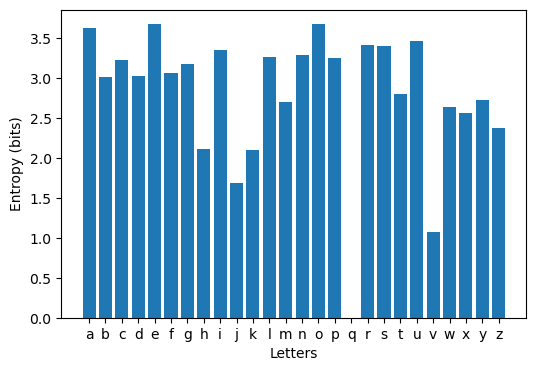

In [19]:
fig,ax = plt.subplots(1, figsize=(6,4))
ax.bar(range(num_letters), conditional_entropy)

ax.set_xticks(range(num_letters))
ax.set_xticklabels(letters)
ax.set_xlabel("Letters")
ax.set_ylabel("Entropy (bits)")
plt.show()